In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
# Проверка на пропущенные значения, они найдены в столбце с номером 32
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [4]:
# Убираем столбец с номером 32
df.drop('Unnamed: 32',axis=1,inplace=True)

In [5]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [6]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

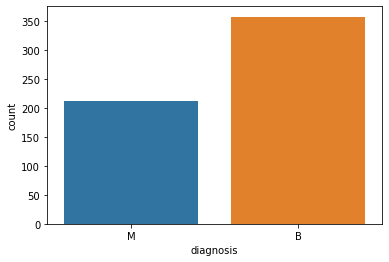

In [7]:
# Распределение целевой переменной. Видна разбалансировка данных, т.е. в датасете значительно больше пациентов 
# с доброкачественными новообразованиями, чем со злокачественными. Желательно уровнять данные, но пока не знаю как.
sns.countplot(df['diagnosis'])

In [8]:
#Базовые статистики датасета
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.drop('id',axis=1,inplace=True)

In [10]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc9cb8e710>,
      dtype=object)

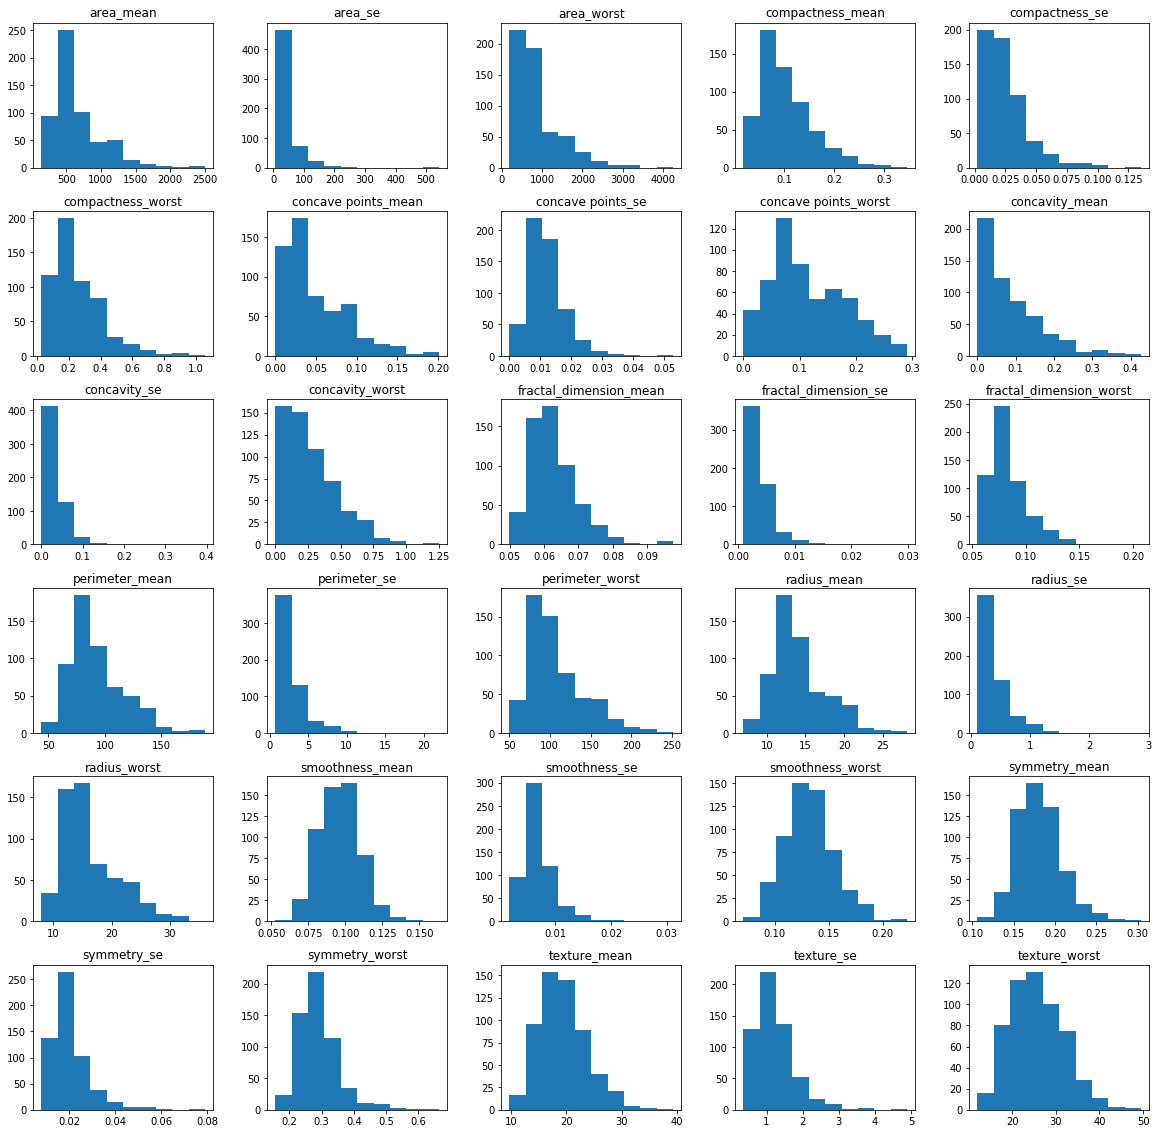

In [11]:
# Построение гистограмм для признаков. Большинство признаков, 
# кроме smothness_mean, smothness_worst, symmetry_mean, texture_mean, texture_worst,
# имеют распределение далекие от нормального.
df.hist(bins=10,figsize=(20,20),grid=False)

In [12]:
#mapping = {'B':0, 'M':1}
#df.diagnosis=df.diagnosis.map(mapping)

In [13]:
# Посмотрим корреляцию признаков. Высокую корреляцию имеют, например, признаки perimeter_mean, radius_mean,  
# area_mean, что понятно, т.к. радиус, периметр и площадь новообразования математически связаны. 
# Значит, один из этих признаков скорее всего лишний. Интересной зависимостью является связь этих признаков
# с concave points_mean (среднее для количества вогнутых частей контура), имющую с ними высокую корреляцию. 
Corr = df.corr()
Corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [14]:
#Выбираем пары признаков с корреляцией больше 0.82
CorField = []
for i in Corr:
    for j in Corr.index[Corr[i] > 0.82]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print (i, j, Corr[i][Corr.index == j].values[0])

radius_mean perimeter_mean 0.9978552814938113
radius_mean area_mean 0.9873571700566119
radius_mean concave points_mean 0.8225285223871791
radius_mean radius_worst 0.9695389726112053
radius_mean perimeter_worst 0.9651365139559878
radius_mean area_worst 0.9410824595860459
texture_mean texture_worst 0.9120445888404215
compactness_mean concavity_mean 0.8831206701772499
compactness_mean compactness_worst 0.8658090398022638
radius_se perimeter_se 0.9727936770160752
radius_se area_se 0.95183011211099
concavity_worst concave points_worst 0.8554338603439984


In [15]:
#Выбираем наиболее информативные
dfh=df[['diagnosis','radius_mean','perimeter_mean','area_mean','concave points_mean']]

In [16]:
# Посмотрим на описание интересных признаков с высокой корреляцией.
dfh.describe()

,radius_mean,perimeter_mean,area_mean,concave points_mean
count,569.000000,569.000000,569.000000,569.000000
mean,14.127292,91.969033,654.889104,0.048919
std,3.524049,24.298981,351.914129,0.038803
min,6.981000,43.790000,143.500000,0.000000
25%,11.700000,75.170000,420.300000,0.020310
50%,13.370000,86.240000,551.100000,0.033500
75%,15.780000,104.100000,782.700000,0.074000
max,28.110000,188.500000,2501.000000,0.201200


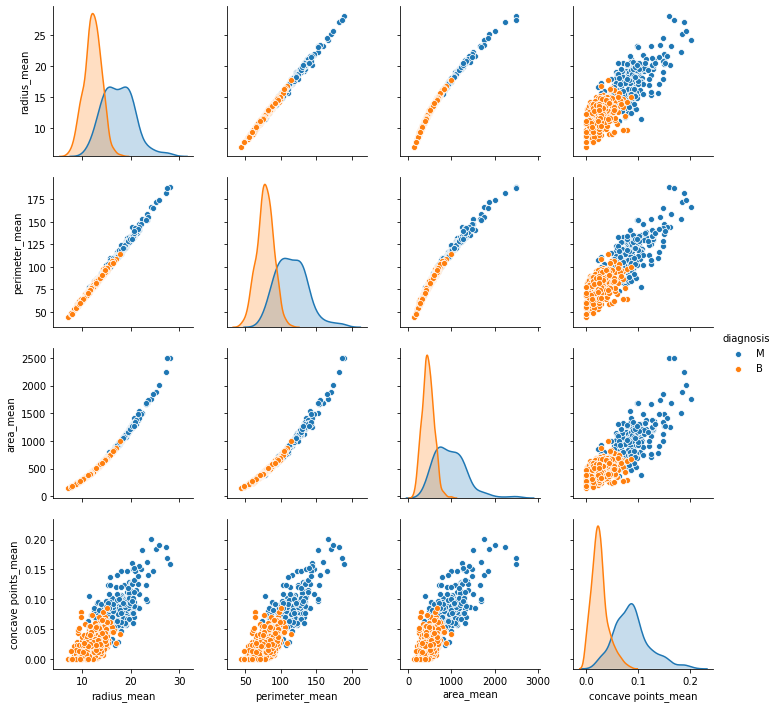

In [17]:
# Гистограммы и попарные scatterplot-ы признаков с высокой корреляцией. Действительно, видна почти линейная
# зависимость у таких признаков как радиус и периметр. У признаков площадь и радиус,
# площадь и периметр зависимость больше похожа на квадратичную, как и должно быть из математических соображений.
# Интересная зависимость у признака concave points_mean со всеми перечисленными - она похожа на линейную.
# В паре 'area_mean'-'concave points_mean' наиболее заметны выбросы данных по пациентам со 
# злокачественными новообразованями.

sns.pairplot(dfh, hue='diagnosis')

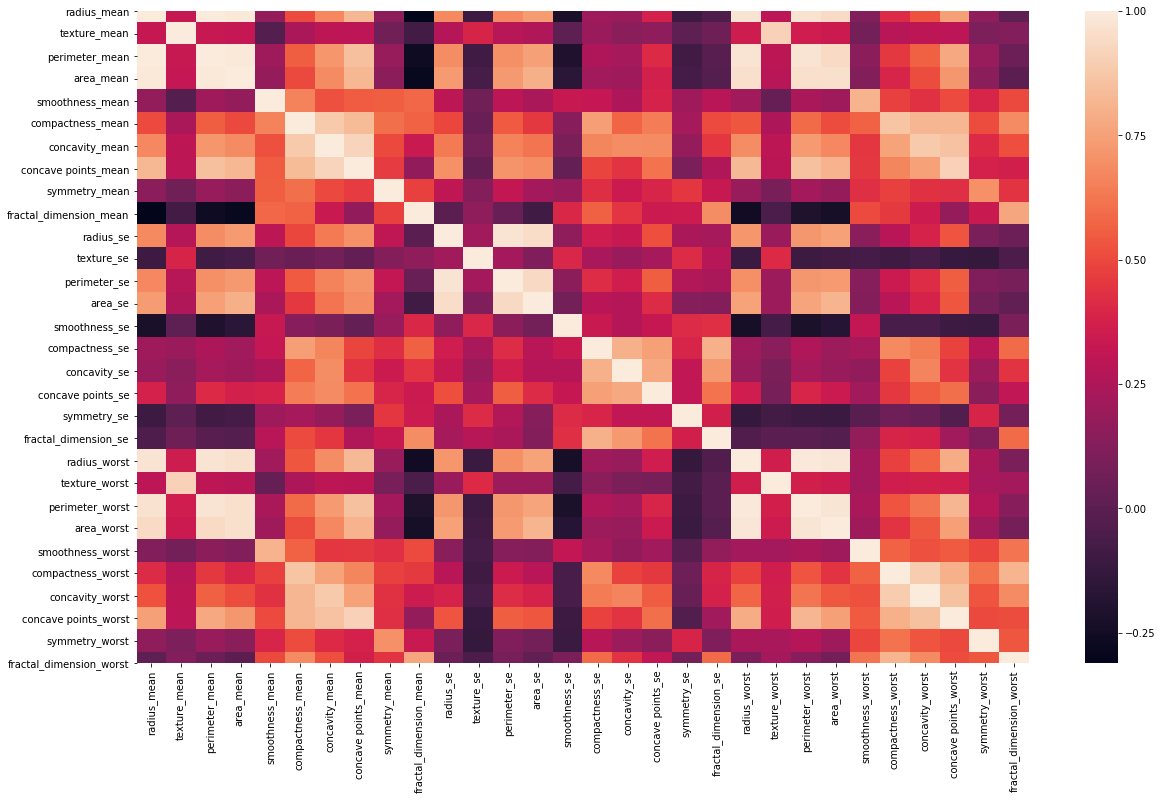

In [18]:
# heatmap для матрицы корреляций всех признаков
plt.figure(figsize=(20,12))
sns.heatmap(Corr)

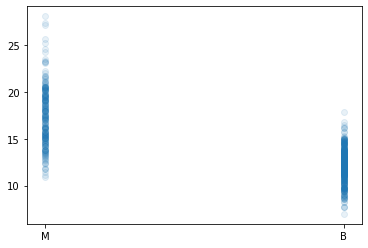

In [19]:
# Отдельно посмотрим на скаттер-плоты по целевой переменной diagnosis признаков с высокой корреляцией.
# Видно, что по признаку radius_mean сильное пересечение двух групп в средней части диапазона, 
# но чем больше радиус, тем вероятнее диагноз М.
plt.scatter(df.diagnosis, df.radius_mean, alpha=0.1)

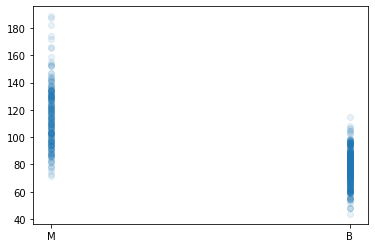

In [20]:
# С признаком периметр то же самое, что и с радиусом.
plt.scatter(df.diagnosis, df.perimeter_mean, alpha=0.1)

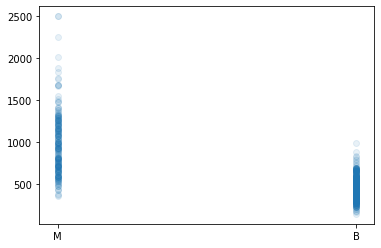

In [21]:
# И с площадью то же самое, что и с радиусом. Но здесь выбросов у группы М больше.
plt.scatter(df.diagnosis, df.area_mean, alpha=0.1)

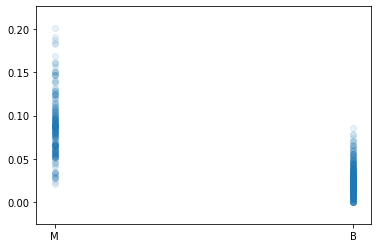

In [22]:
#И с точками вогнутости то же самое
plt.scatter(df.diagnosis, df['concave points_mean'], alpha=0.1)

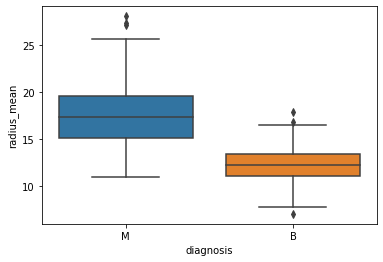

In [23]:
#Строим "ящики с усами" по целевой переменной diagnosis признаков с высокой корреляцией.
# Здесь лучше видно, что диапазоны от первой до третьей квартили (ящики) не пересекаются, значит 
# признак можно использовать для разделения пациентов по диагнозу.
sns.boxplot(x='diagnosis', y='radius_mean', data=df)

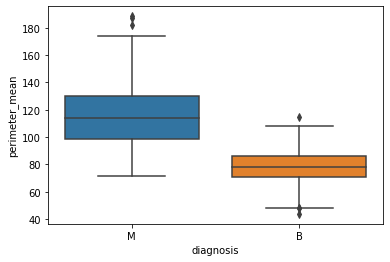

In [24]:
# То же для этого признака
sns.boxplot(x='diagnosis', y='perimeter_mean', data=df)

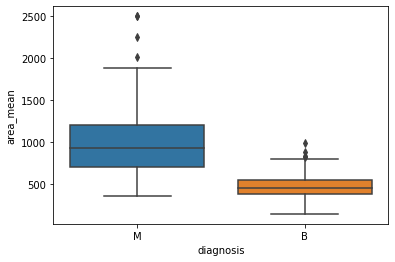

In [25]:
# То же для этого признака
sns.boxplot(x='diagnosis', y='area_mean', data=df)

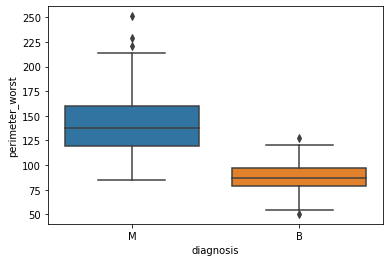

In [26]:
# То же для этого признака
sns.boxplot(x='diagnosis', y='perimeter_worst', data=df)

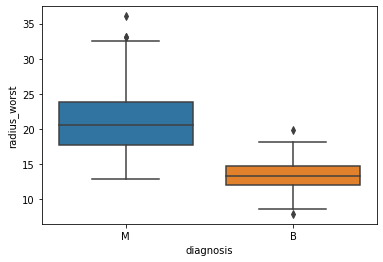

In [27]:
# То же для этого признака
sns.boxplot(x='diagnosis', y='radius_worst', data=df)

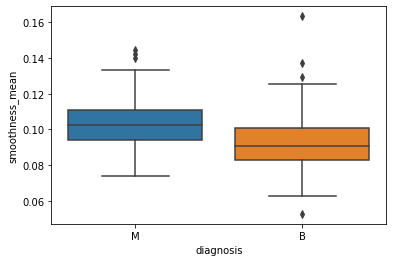

In [28]:
# Тут ящики сильно пересекаются, признак малоинформативен для разделения пациентов по диагнозу.
sns.boxplot(x='diagnosis', y='smoothness_mean', data=df)